EV CHARGING SLOT PREDICTION

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 
import xgboost as xg

DATA LOADING 

In [3]:

data1=pd.read_csv('Demand_History.csv')
data2=pd.read_csv('exisiting_EV_infrastructure_2018.csv')

In [4]:
data1.head()        #data1 - Demand history over 9 (2010-2018) years in the given coordinates

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


In [7]:
data2.head()     #data2  - Existing EV infrastructure (2018) with its supply point coordinates

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14
3,3,30.528626,55.379835,26,5,5
4,4,51.521781,35.116755,32,11,6


NORMALIZATION

In [8]:
from sklearn.preprocessing import MinMaxscaler
scaler=MinMaxscaler()
model=scaler.fit()


ImportError: cannot import name 'MinMaxscaler' from 'sklearn.preprocessing' (c:\Python\Python310\lib\site-packages\sklearn\preprocessing\__init__.py)

EDA

Text(0.5, 1.0, '2018')

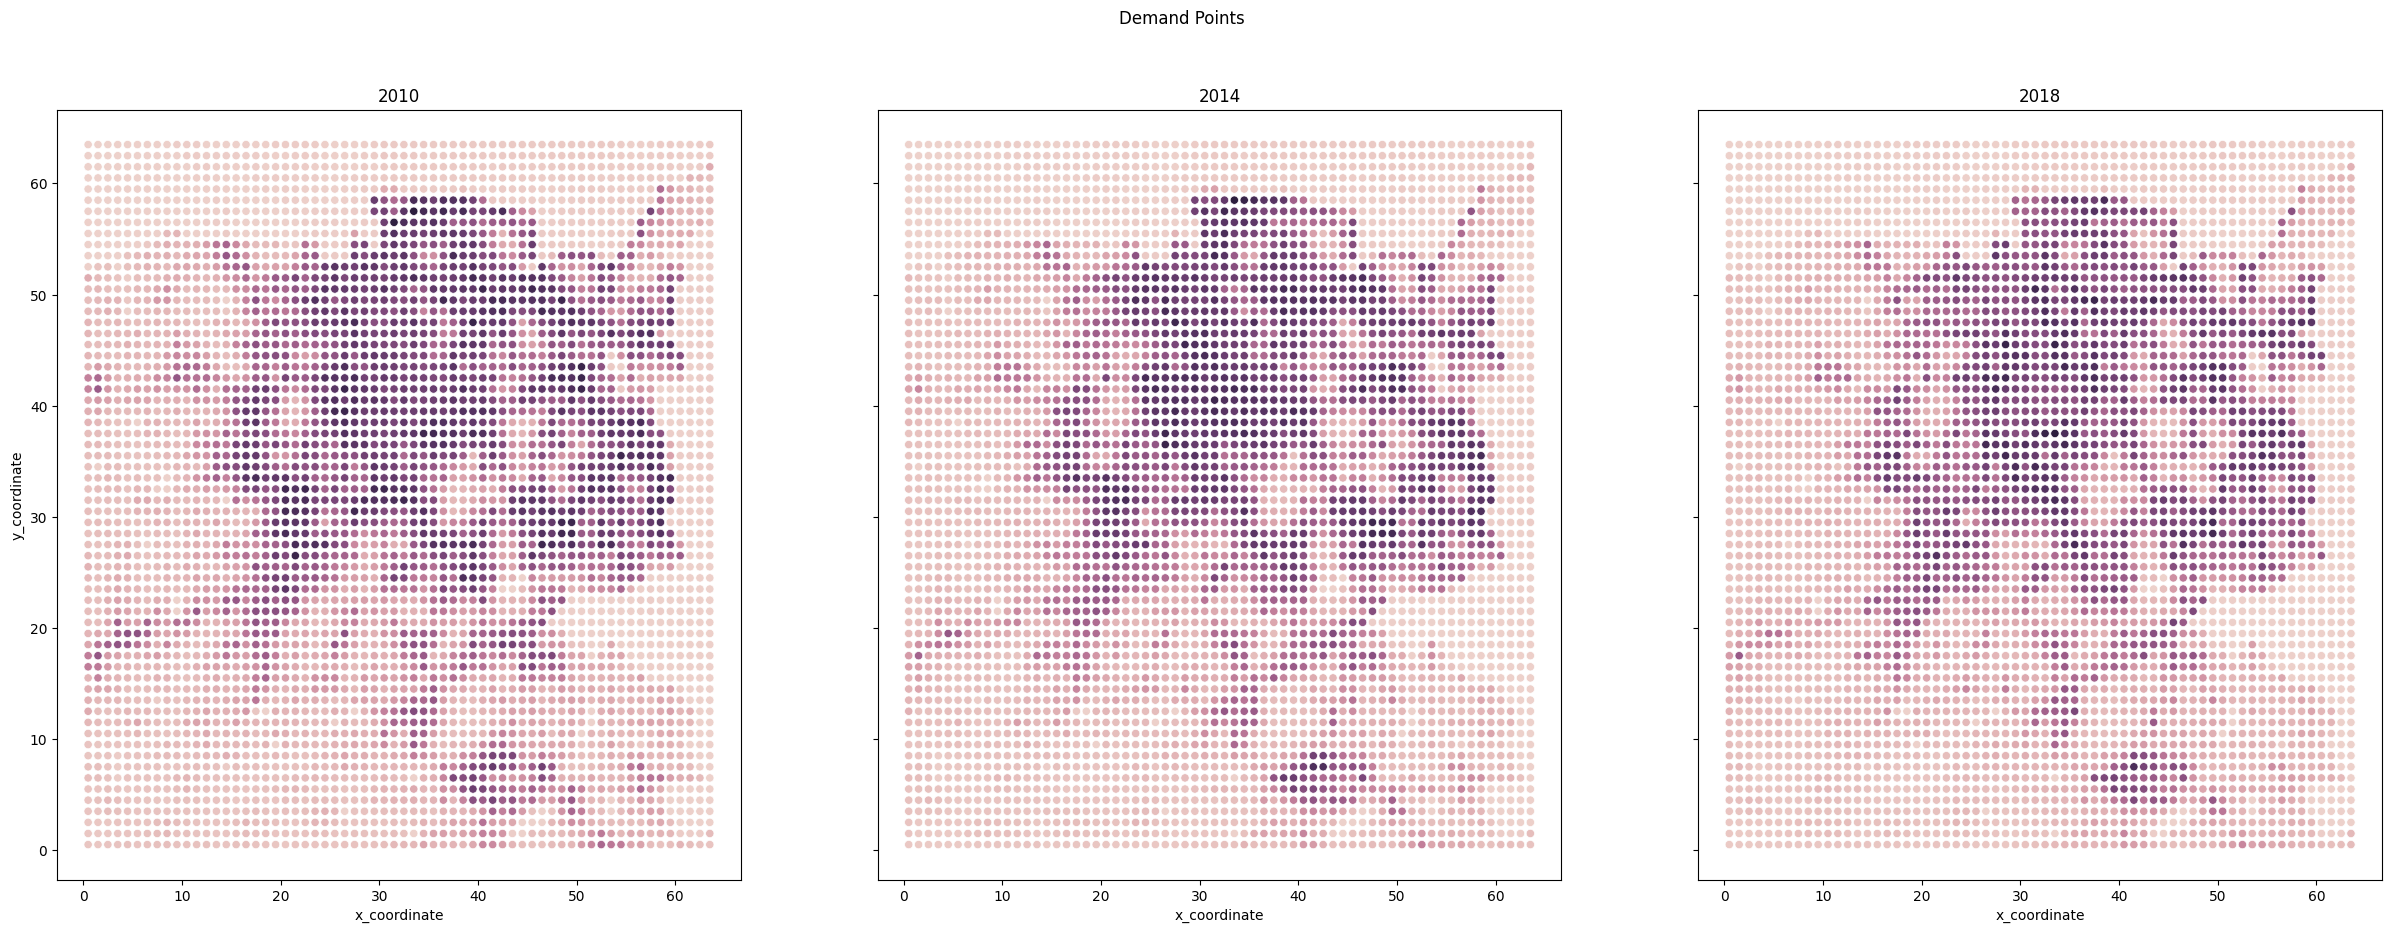

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
fig.suptitle('Demand Points')

sns.scatterplot(ax=axes[0],data=data1,x="x_coordinate",y="y_coordinate",hue="2010",legend=False)
axes[0].set_title("2010")
sns.scatterplot(ax=axes[1],data=data1,x="x_coordinate",y="y_coordinate",hue="2013",legend=False)
axes[1].set_title("2014")
sns.scatterplot(ax=axes[2],data=data1,x="x_coordinate",y="y_coordinate",hue="2016",legend=False)
axes[2].set_title("2018")


Text(0.5, 1.0, 'Existing FCS')

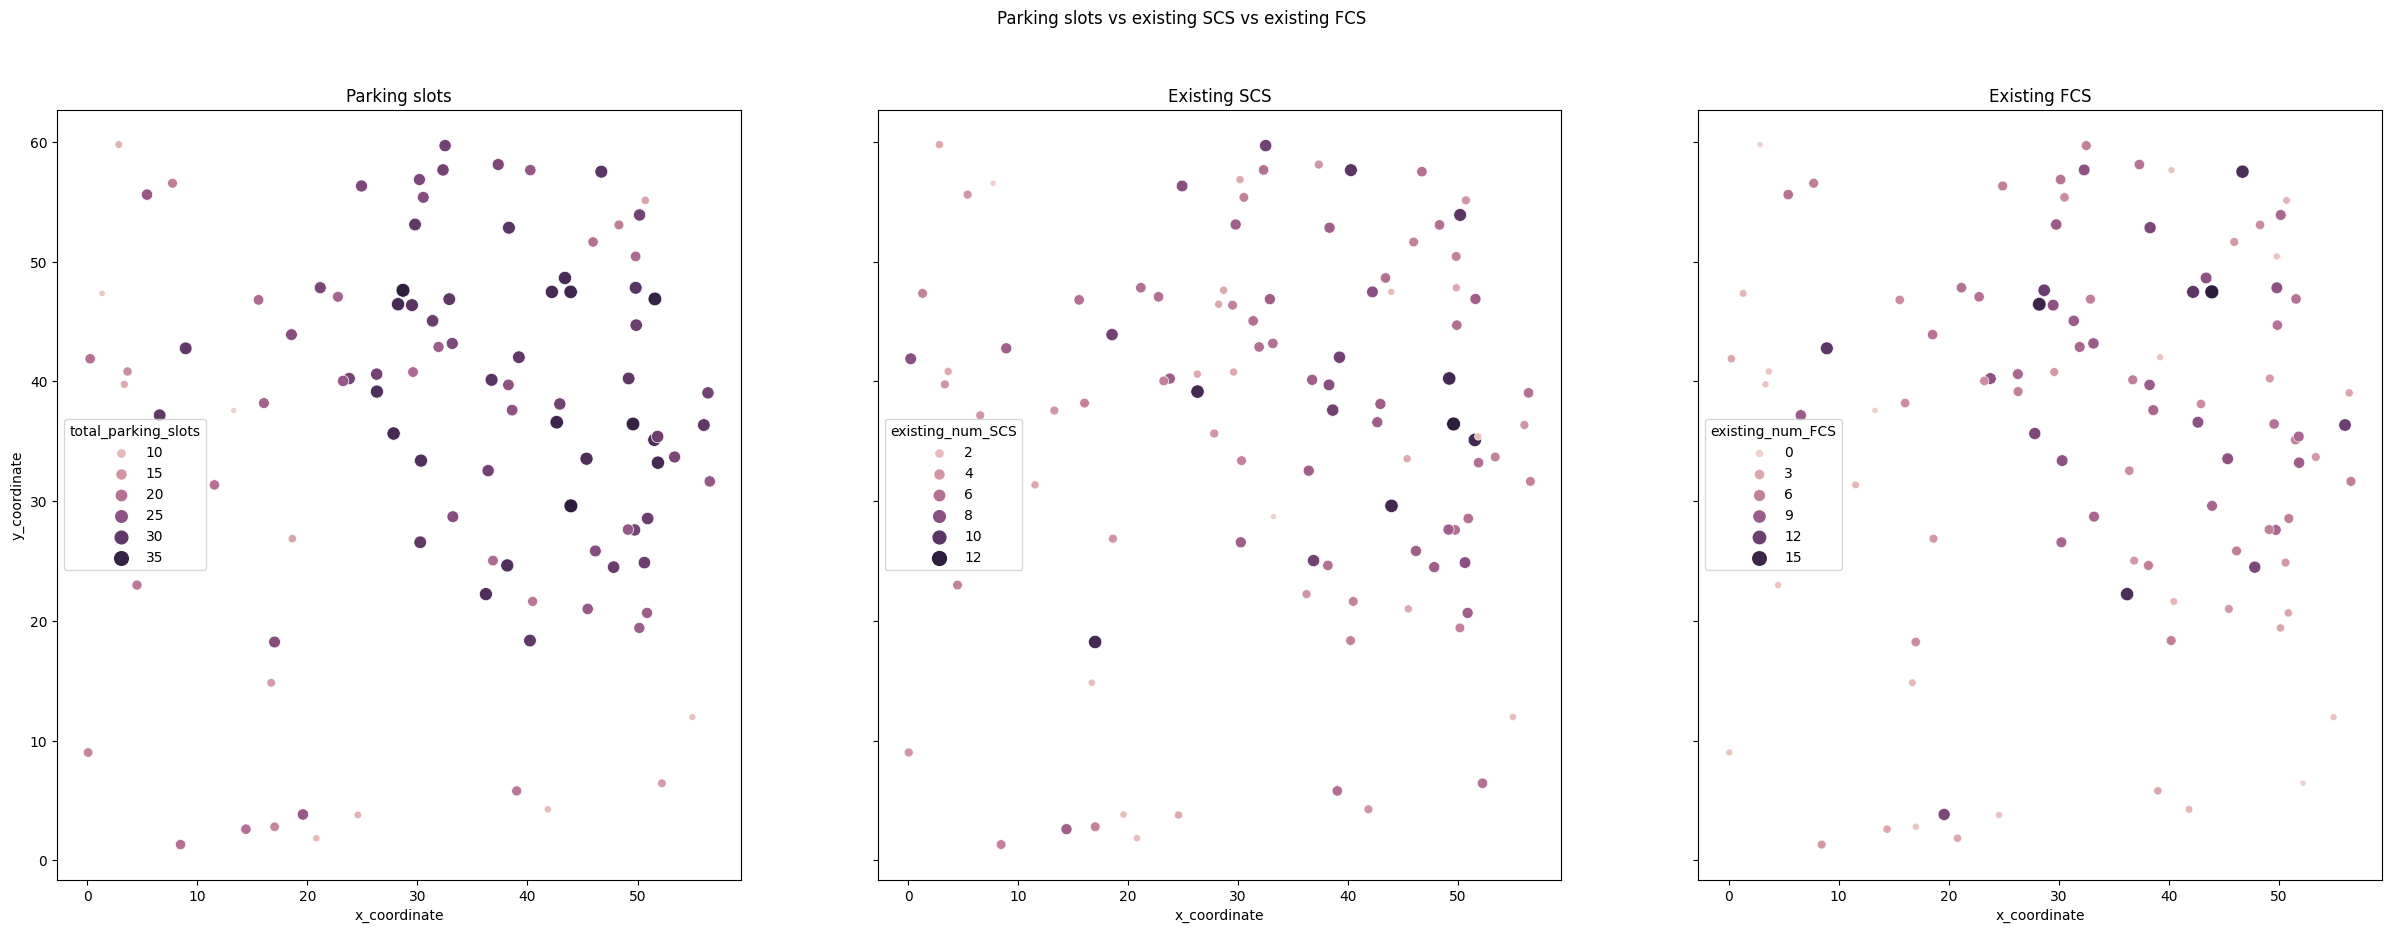

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
fig.suptitle('Supply Points')

sns.scatterplot(ax=axes[0],data=data2,x="x_coordinate",y="y_coordinate",hue="total_parking_slots",size="total_parking_slots",sizes=(20, 100))
axes[0].set_title("Parking slots")

sns.scatterplot(ax=axes[1],data=data2,x="x_coordinate",y="y_coordinate",hue="existing_num_SCS",size="existing_num_SCS",sizes=(20, 100))
axes[1].set_title("Existing SCS")

sns.scatterplot(ax=axes[2],data=data2,x="x_coordinate",y="y_coordinate",hue="existing_num_FCS",size="existing_num_FCS",sizes=(20, 100))
axes[2].set_title("Existing FCS")

<AxesSubplot:>

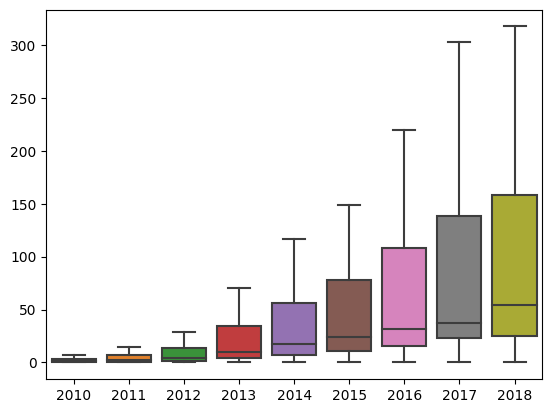

In [ ]:
sns.boxplot(data=data1.iloc[:,3:])

In [ ]:
data3=data1.iloc[:,3:].sum()                # Total demand 
data4=[0,1,2,3,4,5,6,7,8]                               
for i in range(1,9):
     data4[i]=(data3[i]-data3[i-1]) 
data4=pd.Series(data4,index=[2010,2011,2012,2013,2014,2015,2016,2017,2018])     # Total Demand Difference 

Text(0.5, 1.0, 'Total Demand Difference')

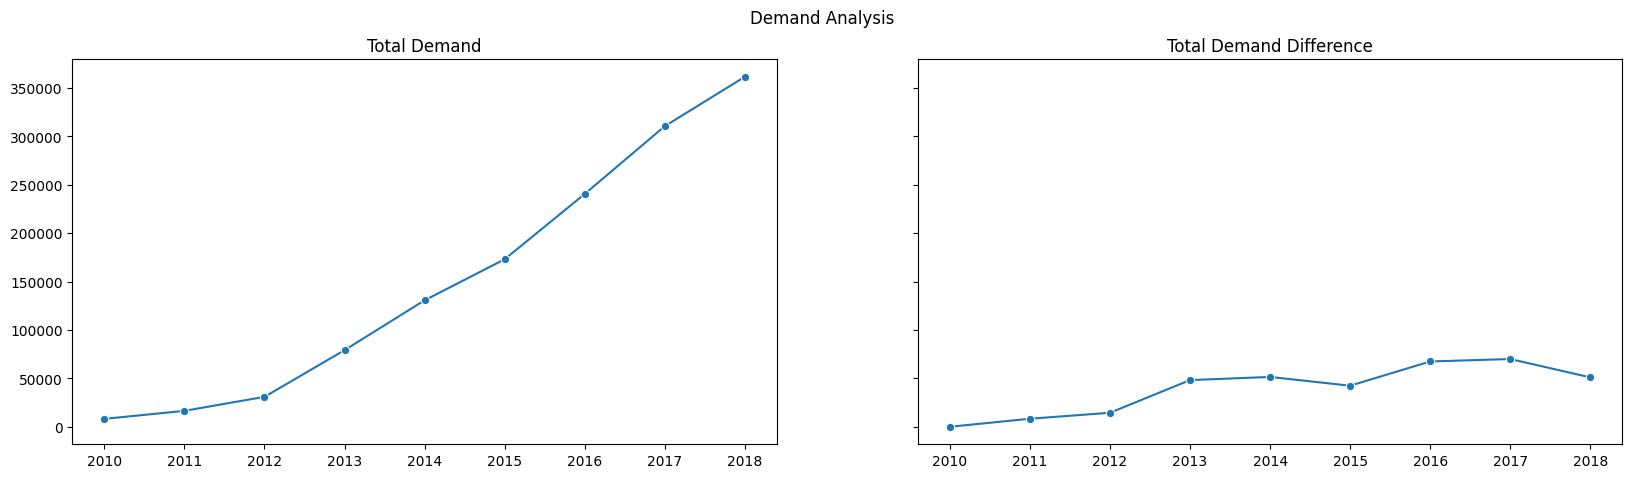

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=True)
fig.suptitle('Demand Analysis')

sns.lineplot(ax=axes[0],data=data3,marker='o')
axes[0].set_title("Total Demand")
sns.lineplot(ax=axes[1],data=data4,marker='o')
axes[1].set_title("Total Demand Difference")

In [11]:
train_x=[0.352242	,0.667932,	0.958593	,2.911901,	4.338274,	6.561995,	8.454417	]
train_y=[10.595324	,13.119572]

xgb=xg.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)
xgb.fit(train_x,train_y)

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (7,))